# Setting

In [49]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

In [50]:
path_data = 'data'
path_tran = 'transaction'

In [51]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [5]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FCTR, TEST


In [6]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [10]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [11]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'to_daily': False,
 'path': 'data'}

In [12]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250207.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [52]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [53]:
WidgetUniverse

## K200

In [54]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-03-17 uploaded.
Price data loaded


In [55]:
#k200.portfolio_data
#k200.get_names()

In [56]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-03-18 downloaded.
kospi200_prices_250318.csv saved
df_prices updated
Execution time of download: 29.82 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [57]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-03-17 uploaded.
Price data loaded


In [58]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [59]:
#PM.review_universe('UV_WTR')

In [60]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-03-18 downloaded.
etfs_weather_250318.csv saved
df_prices updated
Execution time of download: 0.52 secs


In [16]:
#wtr.save()

## FCTR

In [73]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
Price data loaded


In [74]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [75]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_factors_241213.csv saved
df_prices updated
Execution time of download: 1.38 secs


## FUND

In [21]:
fund = PM.create_universe('UV_FUND')

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [ ]:
kw = dict(
    n_years=3, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    overwrite_master=False
)
fund.download(**kw) if WidgetUniverse.values(0) else None

In [15]:
_ = fund.save()

ERROR: failed to save as funds_prices_250131.csv exists


In [16]:
#fund.portfolio_data['universe']

### Master

In [6]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55101BT4402,한국투자TDF알아서2030증권투자신탁(주식혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TDF,글로벌
K55101BT4428,한국투자TDF알아서2035증권투자신탁(주식혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TDF,글로벌
K55101BT4444,한국투자TDF알아서2045증권투자신탁(주식혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TDF,글로벌
K55101BT7397,한국투자TDF알아서2040증권투자신탁(주식혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TDF,글로벌
K55101BY3944,한국투자TIF알아서평생소득증권자투자신탁(채권혼합-재간접형)(C-Re),기업은행,퇴직연금,한국투자,혼합,TIF,글로벌
...,...,...,...,...,...,...,...
KR5234769887,IBK골드마이닝증권자투자신탁 1[주식]종류Ce,기업은행,일반,IBK,주식,원자재,글로벌
K55240D58714,BNK삼성전자중소형증권투자신탁 1(주식)ClassC-e,기업은행,일반,BNK,주식,주식,국내
K55306BO8724,다올글로벌빅테크1등주증권투자신탁[주식]종류Ce,기업은행,일반,다올,주식,기술,글로벌


In [10]:
file_master = 'funds_info_250317'
file_history = 'funds_prices_250228.csv'
path = 'data/tmp'
fd = FundDownloader(file_master, path, check_master=True, msg=False)

In [20]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [21]:
fd.update_master()

100%|███████████████████████████████████████████████████████████████| 32/32 [00:04<00:00,  6.94it/s]


4.6 secs elapsed, 0.0 secs paused (0.0%)


100%|███████████████████████████████████████████████████████████████| 18/18 [00:01<00:00, 12.43it/s]

1.5 secs elapsed, 0.0 secs paused (0.0%)
funds_info_250317.csv saved


### Iterative

In [4]:
file_master = 'funds_info_250317'
file_history = 'funds_prices_250228.csv'
path = 'data/tmp'
fd = FundDownloader(file_master, path, check_master=True, msg=False)

In [7]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

cond = df_cat['seller'] == '기업은행'
cond = cond & (df_cat['account'] == '일반')
tickers = df_cat.index[cond]
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [8]:
#tickers = None
fd.set_tickers(iterative=True, file=file_history, tickers=tickers)

Iterative Downloading set with funds_prices_250228.csv
13 tickers set to download


In [9]:
start_date, end_date = '2005-01-01', '2025-03-01'
_ = fd.download(start_date, end_date, interval=5)

Starting Iterative Downloading where funds_prices_250228.csv will be overwritten


 33%|█████████████████████                                          | 1/3 [20:19<40:38, 1219.03s/it]

 33%|█████████████████████                                          | 1/3 [21:18<42:36, 1278.42s/it]


KeyboardInterrupt: 

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [77]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded


In [35]:
import random
#tickers = [k for k,v in fund.security_names.items() if 'TDF2045' in v]
tickers = random.sample(list(fund.security_names.keys()), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
fund.get_names(tickers)

0) K55232C70460: NH-Amundi글로벌혁신기업증권자투자신탁(UH)[주식]ClassC-P1e
1) K55301CQ5219: 미래에셋친디아컨슈머증권투자신탁 1(주식)종류C-Pe
2) K55307BC6945: 유리베트남알파연금저축증권자투자신탁[주식]_C/C-e

In [78]:
tickers = ['K55307DH1659', 'K55210E77483']
fund.get_names(tickers)

0) K55210E77483: 신한빅사이클자산배분증권자투자신탁[주식혼합-파생형](종류C-pe)
1) K55307DH1659: 유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e

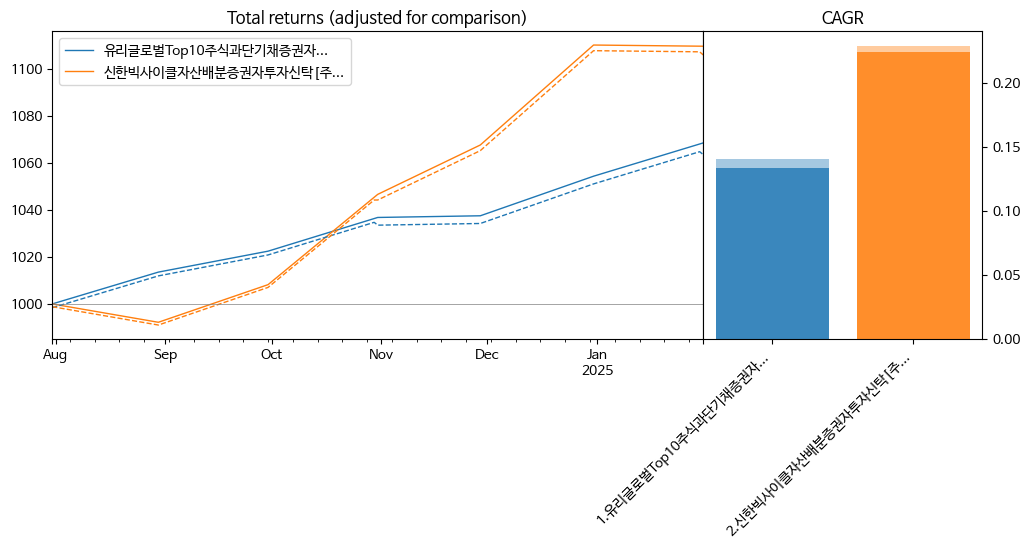

In [79]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [61]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [62]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-03-17 uploaded.
Price data loaded


In [63]:
#liq.get_names()

In [64]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.59it/s]


1.2 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-03-18 downloaded.
krx_liq_prices_250318.csv saved
df_prices updated
Execution time of download: 1.78 secs


## Additional Data

### Cost

*Check missing cost data*

In [23]:
_ = PM.check_cost('UV_FUND', file_cost, path_tran)

Cost data transaction_cost_250207.csv loaded
224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [23]:
fd = FundDownloader.create(fund)
#fd.export_cost('UV_FUND', 'transaction_cost', path=path_tran, update=True)
fd.export_cost('UV_FUND')

Data for 224 funds loaded.
Cost data transaction_cost_241217.csv loaded
Cost data saved to transaction_cost_250207.csv


### Financial Ratio

In [23]:
WidgetUniverse

In [24]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [25]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [13:12<00:00,  3.96s/it]


13.2 mins elapsed, 30.0 secs paused (3.8%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 downloaded
kospi200_ratios_250203.csv saved


In [26]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [27]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-02-03
Price: 2022-01-03 ~ 2025-02-03


# Performance

In [65]:
PM.review()

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FCTR, TEST


In [66]:
pm = PM(
    'MMT_2407', 'PER_2410', 'WTR_2407', 'WTR_2412'
)

MMT_2407:
200 securities from 2022-01-03 to 2025-03-18 uploaded.
Price data loaded
Transaction record to 2025-03-14 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-03-18 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-03-18 uploaded.
Price data loaded
Transaction record to 2025-02-13 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-03-18 uploaded.
Price data loaded
Transaction record to 2024-12-18 loaded



In [53]:
#pm.load('LIQ')
#pm.load('TDF_2406','HANA_2408')

security_names updated
Data of tickers 009900, 016380 downloaded


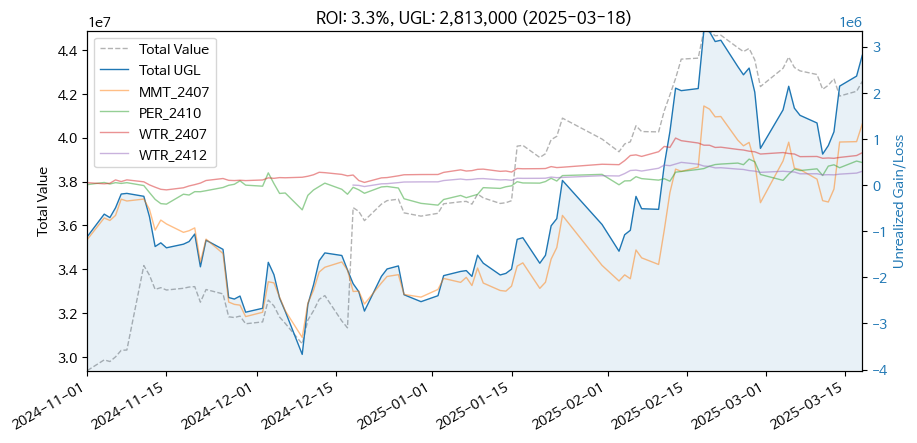

In [67]:
start_date='2024-11-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [68]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [69]:
pm.summary(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-07-18
end,2025-03-18,2025-03-18,2025-03-18,2025-03-18,2025-03-18
buy,"57,649,900","12,249,820","10,365,272","5,783,200","86,048,192"
sell,"42,729,452","2,621,865","943,120",0.0,"46,294,437"
value,"16,243,700","10,117,280","10,124,175","6,081,887","42,567,042"
ugl,"1,323,252","489,325","702,023","298,687","2,813,287"
roi,0.022953,0.039945,0.067728,0.051647,0.032694


*print summary for google sheet 금융자산운용*

In [57]:
pm.util_print_summary(date=w_date.value)

2025-03-17, MMT, 2407, , , , 평가, , 57649900, 42729452, 15862500, 942052, 0.016340912993777934
2025-03-17, PER, 2410, , , , 평가, , 12249820, 2621865, 10148680, 520725, 0.04250878788423007
2025-03-17, WTR, 2407, , , , 평가, , 10365272, 943120, 10062730, 640578, 0.06180040427303779
2025-03-17, WTR, 2412, , , , 평가, , 5783200, 0.0, 6042757, 259557, 0.04488120763591086


### All Funds

In [4]:
portfolios_fund = ['TDF_2406','HANA_2408','SAVE_2503']
pm = PM(*portfolios_fund, verbose=False)

TDF_2406: done
HANA_2408: done
SAVE_2503: done


In [5]:
pm.summary()

,TDF_2406,HANA_2408,TOTAL
start,2024-06-19,2024-08-01,2024-06-19
end,2025-01-31,2025-01-31,2025-01-31
buy,"35,000,000","9,990,000","44,990,000"
sell,0.0,0.0,0.0
value,"35,010,787","10,194,581","45,205,368"
ugl,"10,787","204,581","215,368"
roi,0.000308,0.020479,0.004787


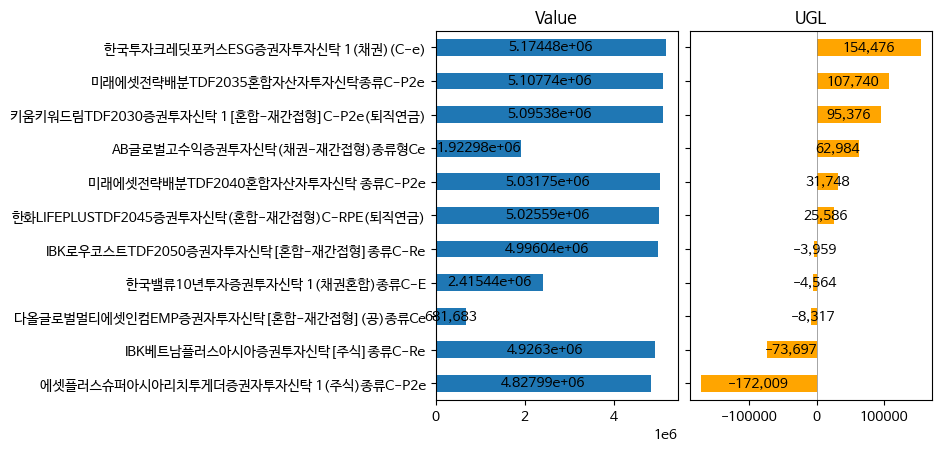

In [7]:
pm.assets(plot=True, sort_by='ugl', roi=False)

# Transaction

## MMT

In [70]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-03-18 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-03-14 loaded


In [71]:
# run after editting record file
pf_mmt.update_record()

In [72]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-02-14 000150           두산  322499          -10    0     0.0    0.000   
           003230         삼양식품  883999            1    4     0.2    0.208   
           010120  LS ELECTRIC  238000           -1   14     0.2    0.196   
           012450    한화에어로스페이스  578000           -1    6     0.2    0.204   
           267260     HD현대일렉트릭  367500            2    9     0.2    0.195   
           298040        효성중공업  479499            7    7     0.2    0.197   
2025-03-14 000150           두산  340250            9    9     0.2    0.193   
           003230         삼양식품  923000           -1    3     0.2    0.175   
           010120  LS ELECTRIC  208500          -14    0     0.0    0.000   
           012450    한화에어로스페이스  751000           -1    3     0.2    0.189   
           042660         한화오션   76550           45   45     0.2    0.217   
           064350         현대로템  108300           33   33     0.2    0.225   
           267260     HD현대일렉트릭  356500           -9    0     0.0    0.000   
           298040        효성중공업  473000           -7    0     0.0    0.000   

                       date*  
date       ticker             
2025-02-14 000150 2025-02-17  
           003230 2025-02-17  
           010120 2025-02-17  
           012450 2025-02-17  
           267260 2025-02-17  
           298040 2025-02-17  
2025-03-14 000150 2025-03-17  
           003230 2025-03-17  
           010120 2025-03-17  
           012450 2025-03-17  
           042660 2025-03-17  
           064350 2025-03-17  
           267260 2025-03-17  
           298040 2025-03-17

*daily transactions for book keeping*

In [73]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

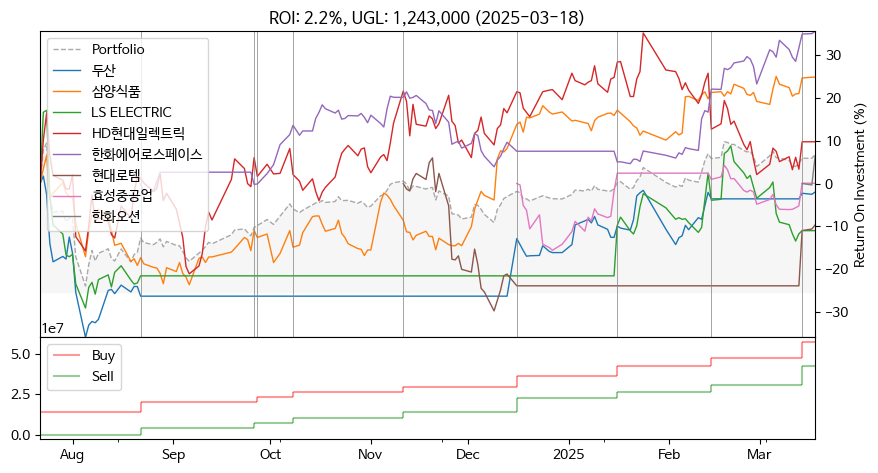

In [74]:
pf_mmt.plot(total=False)

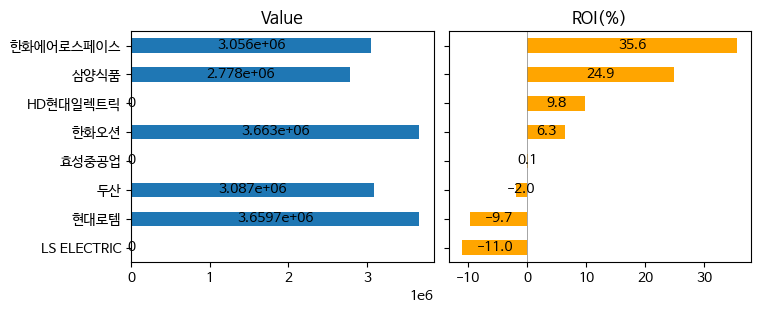

In [75]:
_ = pf_mmt.plot_assets(figsize=(8,3))

In [76]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-03-18, 57651998, 42650984, 16243700, 1242686, 0.02155494376167777


start    2024-07-22
end      2025-03-18
buy      57,651,998
sell     42,650,984
value    16,243,700
ugl       1,242,686
roi        0.021555
dtype: object

In [81]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [82]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_mmt.transaction_halt(**kw) 

In [85]:
date_actual='2025-03-17'

kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-03-07 to 2025-03-07
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 7 %
ROI: 0.4%, UGL: 230,670 (2025-03-14)
All transactions saved to pf_k200_momentum_250314.csv


In [86]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-02-14 000150           두산  322499          -10    0     0.0    0.000   
           003230         삼양식품  883999            1    4     0.2    0.208   
           010120  LS ELECTRIC  238000           -1   14     0.2    0.196   
           012450    한화에어로스페이스  578000           -1    6     0.2    0.204   
           267260     HD현대일렉트릭  367500            2    9     0.2    0.195   
           298040        효성중공업  479499            7    7     0.2    0.197   
2025-03-14 000150           두산  342000            9    9     0.2    0.201   
           003230         삼양식품  917000           -1    3     0.2    0.179   
           010120  LS ELECTRIC  206500          -14    0     0.0    0.000   
           012450    한화에어로스페이스  705000           -2    4     0.2    0.184   
           042660         한화오션   74300           45   45     0.2    0.218   
           064350         현대로템  101600           33   33     0.2    0.218   
           267260     HD현대일렉트릭  338500           -9    0     0.0    0.000   
           298040        효성중공업  454000           -7    0     0.0    0.000   

                       date*  
date       ticker             
2025-02-14 000150 2025-02-17  
           003230 2025-02-17  
           010120 2025-02-17  
           012450 2025-02-17  
           267260 2025-02-17  
           298040 2025-02-17  
2025-03-14 000150 2025-03-17  
           003230 2025-03-17  
           010120 2025-03-17  
           012450 2025-03-17  
           042660 2025-03-17  
           064350 2025-03-17  
           267260 2025-03-17  
           298040 2025-03-17

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [22]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 loaded


In [23]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-03-14 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [24]:
tickers_liq = pf_per.check_universe()

In [25]:
#pf_per.view_record(-2)

In [26]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-03-14, 12250266, 2617050, 10003340, 370124, 0.03021357886045095


start    2024-10-17
end      2025-03-14
buy      12,250,266
sell      2,617,050
value    10,003,340
ugl         370,124
roi        0.030214
dtype: object

In [27]:
#pf_per.update_record()
#pf_per.view_record(-2)

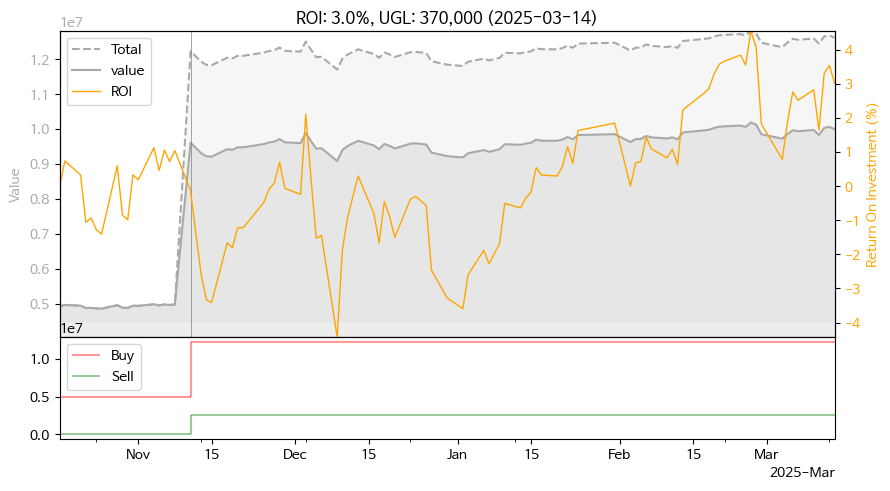

In [28]:
pf_per.plot()

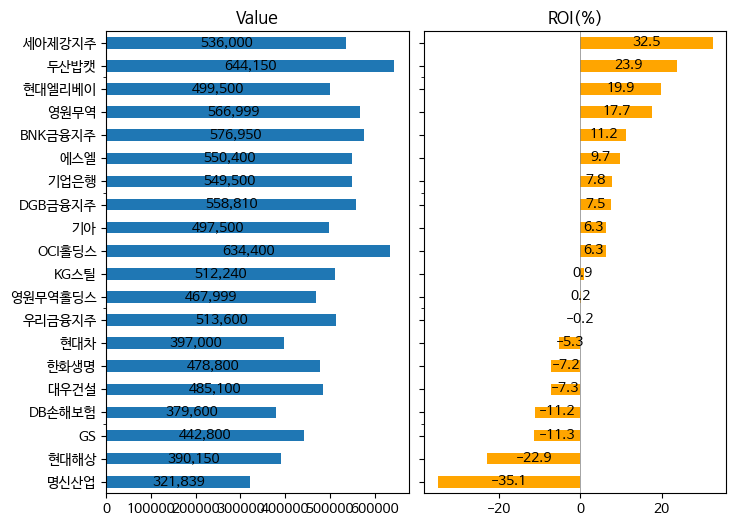

In [33]:
_ = pf_per.plot_assets(figsize=(8,6))

In [46]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [47]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [49]:
kw = dict(
    #sell = tickers_liq,
    halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_per.transaction_halt(**kw) 
#pf_per.view_record(-1)

Trading of assets 009900, 016380 to halt
Updated with transaction on 2025-02-12
Set save=True to save transaction record
ROI: -0.1%, UGL: -13,457 (2025-02-12)


In [52]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2024-12-02 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
Tickers 009900, 016380 added to universe
ROI: 2.0%, UGL: 295,291 (2025-02-12)
Set save=True to save transaction record


In [53]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-01-31 000270       기아  102000           -1    4    0.05    0.043   
           001450     현대해상   24750            2   19    0.05    0.050   
           003030   세아제강지주  205000            0    2    0.05    0.044   
           005380      현대차  206000            0    2    0.05    0.044   
           005830   DB손해보험   97100            1    5    0.05    0.052   
           005850      에스엘   32050           -1   15    0.05    0.051   
           009900     명신산업    1000         -500    0    0.00    0.000   
           009970  영원무역홀딩스   81900            1    6    0.05    0.052   
           010060   OCI홀딩스   79100           -2    6    0.05    0.050   
           016380     KG스틸    1013         -494    0    0.00    0.000   
           017800   현대엘리베이   53000           -9    0    0.00    0.000   
           024110     기업은행   15530           -4   31    0.05    0.051   
           028050    삼성E&A   18010           27   27    0.05    0.052   
           047040     대우건설    3375            6  146    0.05    0.052   
           069260   TKG휴켐스   16950           29   29    0.05    0.052   
           078930       GS   38500            0   12    0.05    0.049   
           088350     한화생명    2495           17  197    0.05    0.052   
           105630     한세실업   13150           37   37    0.05    0.052   
           111770     영원무역   43950           -1   11    0.05    0.051   
           138930  BNK금융지주   12160          -55    0    0.00    0.000   
           139130  DGB금융지주    9220          -10   53    0.05    0.052   
           241560     두산밥캣   48050           -3   10    0.05    0.051   
           316140   우리금융지주   16100           -2   30    0.05    0.051   
           383220      F&F   64300            7    7    0.05    0.048   

                       date*  
date       ticker             
2025-01-31 000270 2025-01-31  
           001450 2025-01-31  
           003030 2025-01-31  
           005380 2025-01-31  
           005830 2025-01-31  
           005850 2025-01-31  
           009900 2025-01-31  
           009970 2025-01-31  
           010060 2025-01-31  
           016380 2025-01-31  
           017800 2025-01-31  
           024110 2025-01-31  
           028050 2025-01-31  
           047040 2025-01-31  
           069260 2025-01-31  
           078930 2025-01-31  
           088350 2025-01-31  
           105630 2025-01-31  
           111770 2025-01-31  
           138930 2025-01-31  
           139130 2025-01-31  
           241560 2025-01-31  
           316140 2025-01-31  
           383220 2025-01-31

In [54]:
#pf_per.update_record()

## WTR
*modified all weather*

In [63]:
pf = 'WTR_2407'
#pf = 'WTR_2412' # 배현정
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-03-17 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-02-13 loaded


In [64]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [65]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32902            7   49  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14

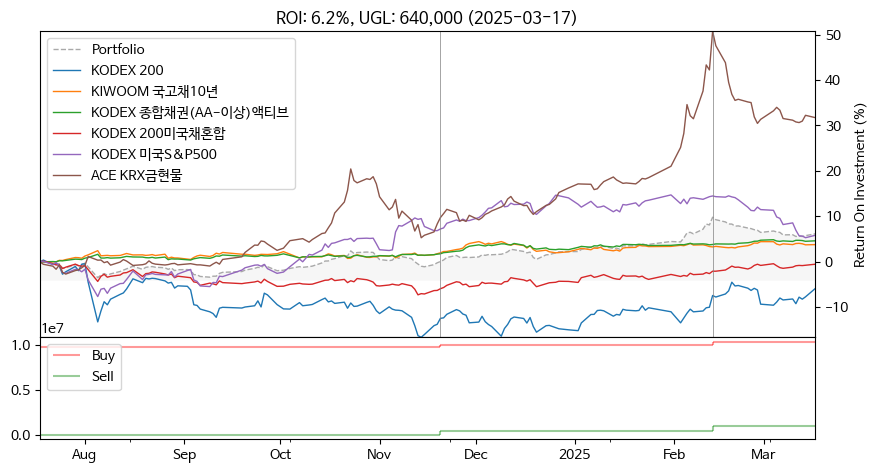

In [66]:
pf_wtr.plot(total=False)

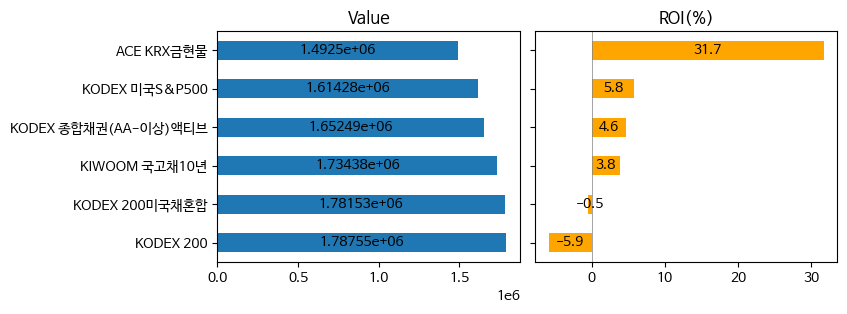

In [67]:
_ = pf_wtr.plot_assets(figsize=(8,3))

In [44]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-02-27, 10365708, 942797, 10144010, 721099, 0.06956583291631402


start    2024-07-18
end      2025-02-27
buy      10,365,708
sell        942,797
value    10,144,010
ugl         721,099
roi        0.069566
dtype: object

In [10]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [11]:
#pf_wtr.performance(metrics=METRICS)

In [12]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=nshares,
    date_actual='2024-02-17'
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

6 tickers selected by Selected from 2025-02-14 to 2025-02-14
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: 9.3%, UGL: 961,841 (2025-02-14)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34490            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            0   86  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-02-14 069500             KODEX 200   34365            0   50  0.1667   
           148070         KIWOOM 국고채10년  115170            0   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117270            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090           -2  132  0.1667   
           379800        KODEX 미국S&P500   20185           -2   85  0.1667   
           411060            ACE KRX금현물   23370            0   74  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-02-14 069500    0.167 2024-02-17  
           148070    0.168 2024-02-17  
           273130    0.160 2024-02-17  
           284430    0.168 2024-02-17  
           379800    0.167 2024-02-17  
           411060    0.169 2024-02-17

## LIQ

In [12]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-03-17 uploaded.
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2024-01-03 loaded


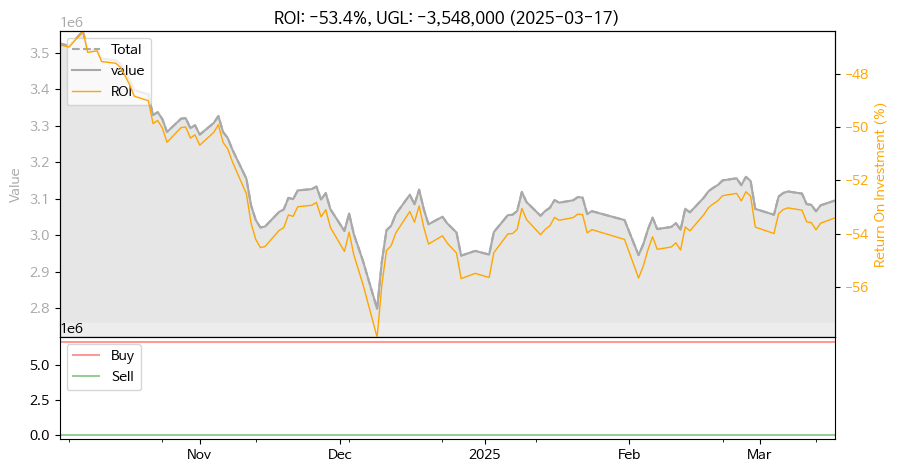

In [13]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

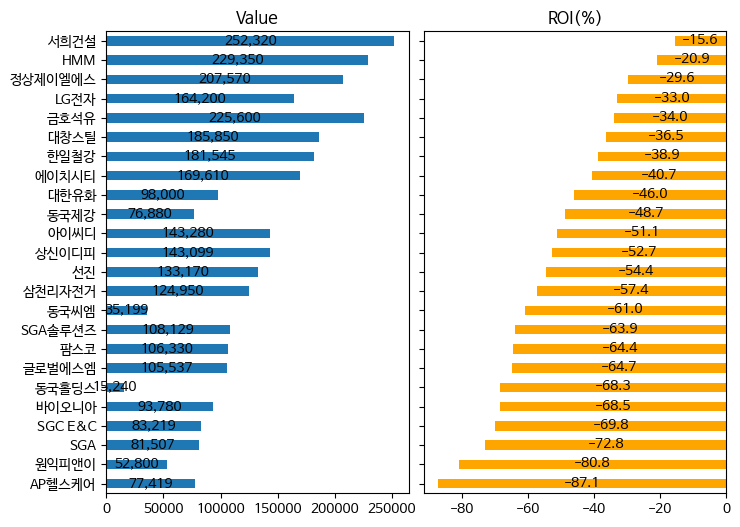

In [14]:
_ = pf_liq.plot_assets(figsize=(8,6))

In [45]:
pf_liq.valuate()

start    2024-01-03
end      2025-03-14
buy       6,642,320
sell            0.0
value     3,081,738
ugl      -3,560,582
roi       -0.536045
dtype: object

In [60]:
#pf_liq.view_record()

## TDF

In [50]:
kw_st = dict(
    method_select = 'selected'    
)

In [51]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, cost=file_cost)
pf_tdf.view_record()

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-01-15 loaded


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

In [52]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

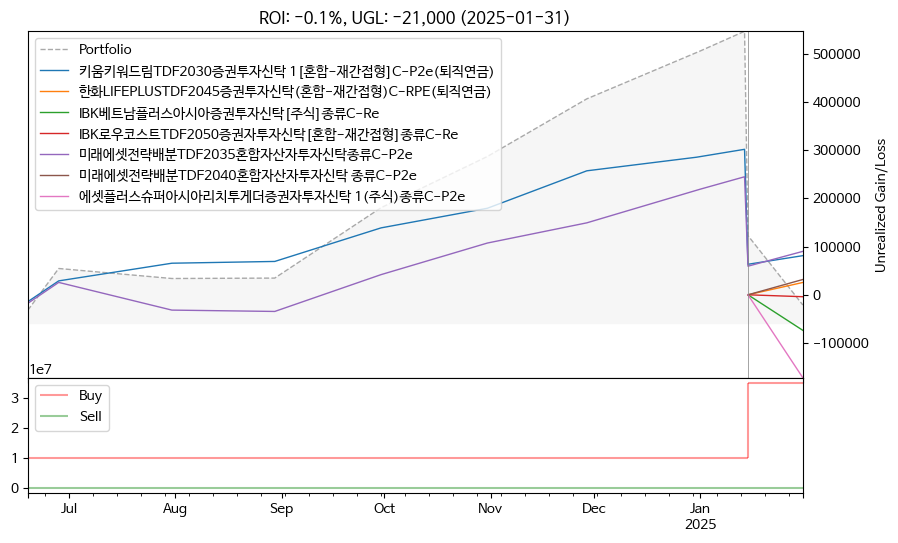

In [53]:
pf_tdf.plot(total=False, roi=False)

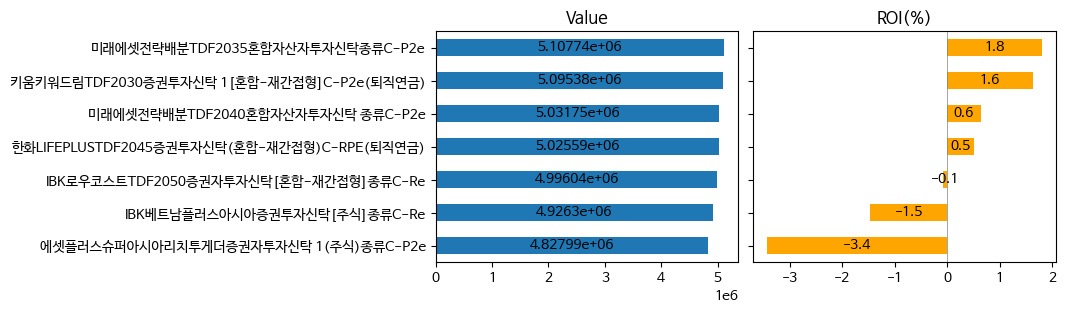

In [55]:
_ = pf_tdf.plot_assets(figsize=(8,3))

In [35]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)
#pf_tdf.valuate(date, total=False)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-01-31, 35000000, -31926, 35010787, -21139, -0.0006039576067228269


start    2024-06-19
end      2025-01-31
buy      35,000,000
sell        -31,926
value    35,010,787
ugl         -21,139
roi       -0.000604
dtype: object

In [21]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [22]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record(-1)

7 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.1%, UGL: 395,347 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                             
2025-01-31 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55206C95800      -333329  5002379  0.1429    0.143 2025-01-31  
           K55213C50702       -23720  5001866  0.1429    0.143 2025-01-31  
           K55234BY9966        76676  5002979  0.1429    0.143 2025-01-31  
           K55234DF3150         5783  5001824  0.1429    0.143 2025-01-31  
           K55301BU6139      -294521  5001709  0.1429    0.143 2025-01-31  
           K55301BU6253       -30280  5001468  0.1429    0.143 2025-01-31  
           K55364CF7048       173532  5001523  0.1429    0.143 2025-01-31

## HANA

In [56]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [57]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [58]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

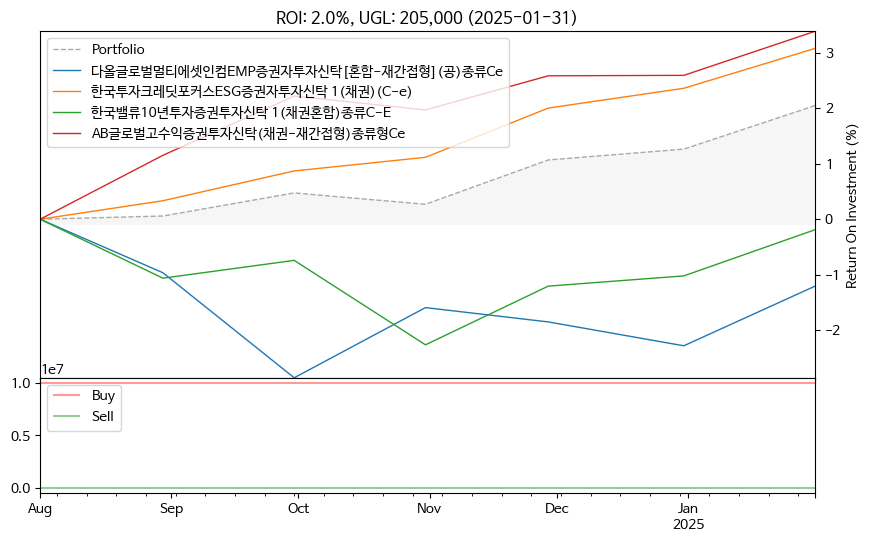

In [59]:
pf_hana.plot(total=False, roi=True)

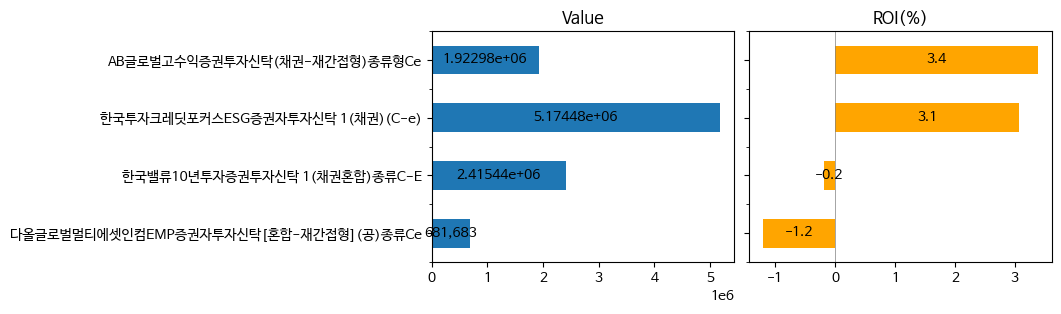

In [60]:
_ = pf_hana.plot_assets(figsize=(8,3))

In [29]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-01-31, 9990000, 0.0, 10194581, 204581, 0.0204785785785786


start    2024-08-01
end      2025-01-31
buy       9,990,000
sell            0.0
value    10,194,581
ugl         204,581
roi        0.020479
dtype: object

In [10]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-01-31 to 2025-01-31
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 0 %
ROI: 1.6%, UGL: 175,993 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-01-31 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-01-31 K55306CV9946       -81429   600255  0.0589    0.059 2025-01-31  
           KR5101888398       895986  6070462  0.5955    0.596 2025-01-31  
           KR5236AS4826      -391659  2023777  0.1986    0.199 2025-01-31  
           KR5370AP9956      -425610  1497373  0.1470    0.147 2025-01-31

## SAVE
연금저축

In [61]:
kw_st = dict(
    tickers = ['K55101D20874', 'KR5235AK9808', 'K55307DH1659', 'K55206C11278']
    #method_select = 'selected'    
)

In [62]:
pf_save = PM.create_portfolio('SAVE_2503', **kw_st, **kw_cost)
pf_save.view_record()

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded
Transaction record to 2025-03-17 loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13

In [30]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()

In [63]:
pf_save.plot(total=False, roi=True)

In [64]:
_ = pf_save.plot_assets(figsize=(8,3))

In [65]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)

ERROR: No transaction before 2025-01-31


In [33]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [35]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_save.transaction_pipeline(**kwargs)
pf_save.view_record()

4 tickers selected by Selected from 2024-07-31 to 2025-01-31
ERROR: check the date as no new transaction
ERROR: No transaction before 2025-01-31


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13

In [25]:
pm.assets(sort_by='name')

name  \
portfolio ticker                                                      
HANA_2408 KR5370AP9956                 AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   
TDF_2406  K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re   
          K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re   
HANA_2408 K55306CV9946        다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   
TDF_2406  K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   
          K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e   
          K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e   
          K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   
HANA_2408 KR5236AS4826                 한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   
          KR5101888398              한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   
TDF_2406  K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)   

                            start        end        buy  sell    value  \
portfolio ticker                                                         
HANA_2408 KR5370AP9956 2024-08-01 2025-01-31  1860000.0   0.0  1922984   
TDF_2406  K55234DF3150 2025-01-15 2025-01-31  5000000.0   0.0  4996041   
          K55234BY9966 2025-01-15 2025-01-31  5000000.0   0.0  4926303   
HANA_2408 K55306CV9946 2024-08-01 2025-01-31   690000.0   0.0   681683   
TDF_2406  K55301BU6139 2024-06-19 2025-01-31  5000000.0   0.0  5107740   
          K55301BU6253 2025-01-15 2025-01-31  5000000.0   0.0  5031748   
          K55364CF7048 2025-01-15 2025-01-31  5000000.0   0.0  4827991   
          K55206C95800 2024-06-19 2025-01-31  5000000.0   0.0  5095376   
HANA_2408 KR5236AS4826 2024-08-01 2025-01-31  2420000.0   0.0  2415436   
          KR5101888398 2024-08-01 2025-01-31  5020000.0   0.0  5174476   
TDF_2406  K55213C50702 2025-01-15 2025-01-31  5000000.0   0.0  5025586   

                             ugl       roi  
portfolio ticker                            
HANA_2408 KR5370AP9956   62984.0  0.033862  
TDF_2406  K55234DF3150   -3959.0 -0.000792  
          K55234BY9966  -73697.0 -0.014739  
HANA_2408 K55306CV9946   -8317.0 -0.012054  
TDF_2406  K55301BU6139  107740.0  0.021548  
          K55301BU6253   31748.0  0.006350  
          K55364CF7048 -172009.0 -0.034402  
          K55206C95800   95376.0  0.019075  
HANA_2408 KR5236AS4826   -4564.0 -0.001886  
          KR5101888398  154476.0  0.030772  
TDF_2406  K55213C50702   25586.0  0.005117

# testing

## testing

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

In [4]:
fund = PM.create_universe('UV_FUND')

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [6]:
import pandas as pd
df = fund.get_names()
df = pd.Series(df)

In [11]:
#df.sample(10).index.to_list()
tickers1 = ['K55235B04308',
 'K55206C11278',
 'K55223C89204',
 'K55102ED7540']
tickers2 = [
 'K55232C99568',
 'K55101BD5217',
 'KR5301AL4401',
 'K55102ED7375',
 'K55105BS5067',
 'KR5301AT1987']

In [13]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    tickers=tickers1,
    overwrite_master=False
)
fund.download(**kw)

100%|███████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 14.86it/s]


0.9 secs elapsed, 0.0 secs paused (0.0%)
4 tickers set to download


100%|████████████████████████████████████████████████████████████████| 4/4 [12:21<00:00, 185.44s/it]


12.4 mins elapsed, 0.3 secs paused (0.0%)
Max error of conversions: 0.00e+00
... done
3 securities from 2017-12-29 to 2025-02-28 downloaded.
funds_prices_250228.csv saved
K55102ED7540: 12
K55206C11278: 12
K55223C89204: 12
REMINDER: 3 equities converted to daily
Daily metrics in Performance statistics must be meaningless
df_prices updated
Execution time of download: 743.38 secs


In [15]:
_ = fund.save()

ERROR: failed to save as funds_prices_250131.csv exists


## testing

## Implementing

In [40]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

In [41]:
path_data = 'data'
path_tran = 'transaction'

In [77]:
class FundDownloader(FundDownloader):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.download_type = None
        self.file_downloading = None

    
    def set_tickers(self, tickers=None, col_ticker='ticker', 
                    download_type=None, file=None):
        """
        set tickers to download prices
        file: temp file to update depending on download_type
        download_type: 
            'iterative' to add data of new tickers to existing data 
            'cumulative' to add date of new time periods to existing data 
        """
        data_tickers = self.data_tickers
        if data_tickers is None:
            return print('ERROR')
        else:
            tickers_all = data_tickers.index.to_list()
    
        if download_type == 'cumulative':
            if file is None:
                return print('ERROR: file required for cumulative downloading')
            try:
                df_rates = pd.read_csv(f'{self.path}/{file}', parse_dates=[0], index_col=[0])
                tickers_all = [x for x in tickers_all if x in df_rates.columns]
                self.df_prices = df_rates
                tickers = None # tickers set by file not by arg in cumulative downloading
                print(f'Cumulative Downloading set with {file}')
            except FileNotFoundError as e: # assuming 1st running if no file exits
                print(f'REMINDER: Make sure starting new cumulative downloading')            
            self.file_downloading = file # turn on cumulative downloading
        elif download_type == 'iterative': # redefine tickres_all as all tickers not yet downloaded
            if file is None:
                return print('ERROR: file required for iterative downloading')
            try:
                df_prices = pd.read_csv(f'{self.path}/{file}', parse_dates=[0], index_col=[0])
                tickers_all = [x for x in tickers_all if x not in df_prices.columns]
                random.shuffle(tickers_all) # shuffle to try new tickers before failed tickers
                self.df_prices = df_prices
                print(f'Iterative Downloading set with {file}')
            except FileNotFoundError as e: # assuming 1st running if no file exits
                print(f'REMINDER: Make sure starting new iterative downloading')
            self.file_downloading = file # turn on iterative downloading
        else:
            self.file_downloading = None # reset to normal downloading
    
        if tickers is None:
            tickers = tickers_all
        else:
            tickers = [tickers] if isinstance(tickers, str) else tickers
            # check if all tickers given in tickers_all
            n = pd.Index(tickers).difference(tickers_all).size
            if n > 0:
                print(f'WARNING: {n} funds unable to process')
                tickers = pd.Index(tickers).intersection(tickers_all).to_list()
    
        print(f'{len(tickers)} tickers set to download')
        self.tickers = tickers
        self.download_type = download_type
        return None
    
    def download(self, start_date, end_date, freq='monthly', percentage=True,
                 url=None, headers=None,
                 interval=5, pause_duration=.1, msg=False,
                 file=None, path='.', years=2):
        """
        download rate and convert to price using prices in settlement info
        interval:
            num of tickers for each batch if download_type is iterative
            every num of tickers to download befoare intermediate pause for else
        """
        data_tickers = self.data_tickers
        tickers = self.tickers
        download_type = self.download_type
        if tickers is None:
            return print('ERROR: load tickers first')
    
        kwargs = dict(freq=freq, url=url, headers=headers, interval=interval, 
                      pause_duration=pause_duration, msg=msg)
        if download_type == 'cumulative':
            df_rates = self.df_prices
            file, path = self.file_downloading, self.path
            print(f'Starting Cumlative Downloading where {file} will be overwritten')
            # download rates
            df_rates = self._download_cumulative(start_date, end_date, df_rates, tickers, 
                                                 years, file, path, **kwargs)
            if df_rates.index.duplicated().any():
                print('ERROR: Check duplicated dates in rate data')
                return df_rates
        
            return None
        
        elif download_type == 'iterative': # update existing data with downloaded for every interval
            df_prices = self.df_prices
            file, path = self.file_downloading, self.path
            print(f'Starting Iterative Downloading where {file} will be overwritten')
            kwargs['interval'] += 1 # no pause for iterative downloading 
            #kwargs['msg'] = False
            blocks = [tickers[i:i + interval] for i in range(0, len(tickers), interval)]
            tracker = TimeTracker(auto_start=True)
            for tkrs in tqdm(blocks):
                df_rates = self._get_rate(tkrs, start_date, end_date, progress_meter=False, **kwargs)
                if df_rates is None:
                    print(f"ERROR: Check {', '.join(tkrs[:3])} ...")
                    continue
                df_prc, sr_err = self._get_prices(df_rates, data_tickers, percentage=percentage, msg=False)
                if sr_err is not None:
                    df_prices = df_prc if df_prices is None else pd.concat([df_prices, df_prc], axis=1)
                    _ = save_dataframe(df_prices, file, path, overwrite=True, msg_succeed=None)
                    self.df_prices = df_prices
            tracker.stop()
            return None
        else:
            # download rates
            df_rates = self._get_rate(tickers, start_date, end_date, **kwargs)
            # convert to price
            df_prices, sr_err = self._get_prices(df_rates, data_tickers, percentage=percentage, msg=msg)
            if sr_err is not None:
                self.df_prices = df_prices
                self.save(file, path) if file is not None else None
            return sr_err

    
    def _download_cumulative(self, start_date, end_date, df_rates, tickers, years, file, path, 
                             percentage=True, **kwargs) :
        start_date, end_date = pd.DatetimeIndex([start_date, end_date])
        if df_rates is None:
            end = end_date
        else:
            start, end = get_date_minmax(df_rates)
            if end != end_date:
                end, end_date = [x.strftime('%Y-%m-%d') for x in [end, end_date]]
                return print(f'ERROR: End date {end} of data differs with {end_date}')
            else:
                end = start - pd.DateOffset(days=1)
                # remove tickers from downloading if value of start date is None
                tickers = df_rates.columns[df_rates.sort_index().iloc[0].notna()]
                
        # download rates
        unit = 100 if percentage else 1
        while (end >= start_date) and (len(tickers) > 0):
            # loop for reverse time order to filter out completed tickers
            start = max(end - pd.DateOffset(years=years), start_date)
            df_r = self._get_rate(tickers, start, end, **kwargs)
            if df_r is None:
                continue
            else:
                if df_r.sum().sum() == 0:
                    break
            df_r = df_r.sort_index()
            if df_rates is None:
                df_rates = df_r
            else:
                for tkr in df_r.columns:
                    ft = (1 + df_r[tkr].dropna().iloc[-1] / unit)
                    df_rates[tkr] = ft * (unit + df_rates[tkr])  - unit
                # remove last date of df_r before concat
                df_rates = pd.concat([df_rates, df_r.iloc[:-1]], axis=0)
            df_rates = df_rates.sort_index().round(2)
            _ = save_dataframe(df_rates, file, path, overwrite=True, msg_succeed=None)
            # remove tickers completed
            tickers = df_rates.columns[df_rates.iloc[0].notna()]
            end = df_rates.index.min() # include prv start date
        return df_rates

In [78]:
from pf_utils import save_dataframe, get_date_minmax
import pandas as pd

In [79]:
file_master = 'funds_info_250317'
file_history = 'funds_prices_250228.csv'
path = 'data/tmp'
fd = FundDownloader(file_master, path, check_master=True, msg=False)

In [80]:
tickers = ['K55234DF2657', 'K55234DF2459', 'K55301BU6139', 'K55105BU1161',
       #'K55210BU2385', 'K55206C95800', 'K55210BU2435', 'K55213C51890',
       'K55223BT1450', 'K55105BS5067']

In [81]:
file_tmp = 'funds_rates_250228.csv'
fd.set_tickers(download_type='cumulative', file=file_tmp, tickers=tickers)

REMINDER: Make sure starting new cumulative downloading
6 tickers set to download


In [82]:
start_date, end_date = '2015-01-01', '2025-03-01'
_ = fd.download(start_date, end_date)

Starting Cumlative Downloading where funds_rates_250228.csv will be overwritten


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.82it/s]


In [83]:
fd.failed

[]

In [74]:
df = pd.read_csv('data/tmp/funds_rates_250228.csv', index_col=[0], parse_dates=[0])
#df['K55234DF2657'].loc['2022-11-01':'2023-08-01']

In [86]:
df.index.duplicated().sum()

0

In [76]:
df.round(2)

,K55234DF2657,K55234DF2459,K55301BU6139,K55105BU1161,K55223BT1450,K55105BS5067
date,,,,,,
2017-07-31,NaN,NaN,NaN,NaN,0.00,0.00
2017-08-31,NaN,NaN,NaN,0.00,-0.41,-1.05
2017-09-29,NaN,NaN,0.00,1.15,1.14,0.45
2017-10-31,NaN,NaN,2.67,2.30,2.79,2.16
2017-11-30,NaN,NaN,3.86,3.33,3.62,3.34
...,...,...,...,...,...,...
2024-10-31,13.91,19.47,55.49,33.06,47.46,39.14
2024-11-29,14.62,20.28,56.51,33.37,48.68,39.28
2024-12-31,15.61,22.00,58.14,32.89,50.19,38.71


In [25]:
import pandas as pd
from pf_utils import get_date_minmax

start_date, end_date = '2005-01-01', '2025-01-31'
#get_date_minmax(pd.Series(None, index=[start_date, end_date]))

In [26]:
start_date, end_date = pd.DatetimeIndex([start_date, end_date])

In [27]:
start_date

Timestamp('2005-01-01 00:00:00')

In [34]:
start, end = get_date_minmax(fund.df_prices)

In [39]:
end, end + pd.DateOffset(years=1)

(Timestamp('2025-01-31 00:00:00'), Timestamp('2026-01-31 00:00:00'))

In [32]:
end_date, end.strftime('%Y-%m-%d')

(Timestamp('2025-01-31 00:00:00'), '2025-01-31')

In [22]:
df = pd.read_csv('data/funds_prices_250131.csv', index_col=[0], parse_dates=[0])
df.columns[]

Index(['K55234DF2657', 'K55234DF2459', 'K55301BU6139', 'K55105BU1161',
       'K55210BU2385', 'K55206C95800', 'K55210BU2435', 'K55213C51890',
       'K55223BT1450', 'K55105BS5067',
       ...
       'KR5235A52578', 'KR5235AK9691', 'KR5235AK9774', 'KR5235AK9808',
       'KR5301AK5995', 'KR5301AK6274', 'KR5301AL4401', 'KR5301AT1938',
       'KR5301AT1987', 'KR5364AH9467'],
      dtype='object', length=224)

In [56]:
df.columns[df.sort_index().iloc[0].notna()]

Index(['KR5102314204', 'KR5102314212', 'KR5102314352'], dtype='object')

In [55]:
df.sort_index().iloc[0].notna()

K55234DF2657    False
K55234DF2459    False
K55301BU6139    False
K55105BU1161    False
K55210BU2385    False
                ...  
KR5301AK6274    False
KR5301AL4401    False
KR5301AT1938    False
KR5301AT1987    False
KR5364AH9467    False
Name: 2005-01-31 00:00:00, Length: 224, dtype: bool

# testing